Import required libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import logging
import os
import pandas as pd
import wandb
from simpletransformers.t5 import T5Model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

Load data from CSV

In [2]:
train_noupsample_df = pd.read_csv('./data/singletask_noupsampling_train.csv')
eval_noupsample_df = pd.read_csv('./data/singletask_noupsampling_val.csv')
train_upsample_df = pd.read_csv('./data/singletask_train.csv')

Login to Weights & Biases

In [3]:
with open('./wandb.ini', 'r') as f:
    os.environ['WANDB_API_KEY'] = f.readline().strip().split('=')[1]

In [4]:
# !wandb login $wandb_apikey

Set logging level

In [5]:
# logging.basicConfig(level=logging.ERROR)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.ERROR)

Initialize model for no upsamples

In [6]:
model_noupsample_args = {
    "output_dir": './single-task-noupsample', #specify output directory
    "max_seq_length": 400, # maximum sequence length in tokens
    "train_batch_size": 2, # training batch size
    "eval_batch_size": 2, # evaluation batch size
    "num_train_epochs": 4, # number of epochs
    "evaluate_during_training": True, # run evaluation during training
    "evaluate_during_training_steps": 15000, # steps in training before eval
    "evaluate_during_training_verbose": True, # print results from evaluation during training
    "use_multiprocessing": False, # use multiprocessing when converting data into features
    "fp16": False, # use fp16 mode
    "save_steps": -1, # save a model checkpoint at every specified number of steps
    "save_eval_checkpoints": False, # save evaluation checkpoints
    "save_model_every_epoch": False, #save model checkpoint at the end of every epoch
    "reprocess_input_data": True, # reprocess the input data
    "overwrite_output_dir": True, # overwrite the output directory
    "wandb_project": "Opinion Mining - T5 - single task",
}

In [7]:
model_noupsample = T5Model('t5', 't5-small', use_cuda=False, args=model_noupsample_args)

Train the model with data without upsamples

In [8]:
model_noupsample.train_model(train_noupsample_df, eval_data=eval_noupsample_df)

  0%|          | 0/192 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

wandb: Currently logged in as: textomatic. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 4:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

Running Epoch 1 of 4:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

Running Epoch 2 of 4:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

Running Epoch 3 of 4:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

(384,
 {'global_step': [96, 192, 288, 384],
  'eval_loss': [0.25097066023619846,
   0.35321690533310174,
   0.33014628814533353,
   0.2773931112378341],
  'train_loss': [0.18223527073860168,
   1.6270962953567505,
   0.5607584118843079,
   3.3109274227172136e-05]})

In [9]:
wandb.finish()

Training loss,▁▂▁█▁▁▁
eval_loss,▁█▆▃
global_step,▁▂▂▃▄▄▅▆▆▇█
lr,▁▁▁▁▁▁▁
train_loss,▂█▃▁
Training loss,0.00702
eval_loss,0.27739
global_step,384
lr,0.001
train_loss,3e-05


Evaluate the model

In [10]:
model_noupsample_eval_args = {
    "overwrite_output_dir": True,
    "max_seq_length": 400,
    "eval_batch_size": 4,
    "use_multiprocessing": False,
    "num_beams": 5,
    "do_sample": True,
    "max_length": 10,
    "top_k": 50,
    "top_p": 0.95,
    "num_return_sequences": 2,
}
# Load the trained model
model_noupsample_eval = T5Model("t5", "single-task-noupsample", use_cuda=False, args=model_noupsample_eval_args)

In [11]:
# Prepare the data for testing
to_predict = [
    prefix + ": " + str(input_text)
    for prefix, input_text in zip(eval_noupsample_df["prefix"].tolist(), eval_noupsample_df["input_text"].tolist())
]
truth = eval_noupsample_df["target_text"].tolist()
tasks = eval_noupsample_df["prefix"].tolist()

In [12]:
# Prepare truth labels for testing
val_labels = eval_noupsample_df['target_text']

In [13]:
# Get the model predictions
preds_noupsample = model_noupsample_eval.predict(to_predict)

Generating outputs:   0%|          | 0/13 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/98 [00:00<?, ?it/s]

In [14]:
predicted_noupsample_labels = []
for cur_pred in preds_noupsample:
    cur_pred = cur_pred[0].strip()
    predicted_noupsample_labels.append(cur_pred)

In [15]:
print(classification_report(val_labels, predicted_noupsample_labels))

                 precision    recall  f1-score   support

       Question       0.92      0.92      0.92        37
         Review       1.00      0.33      0.50         3
Stylus problems       0.00      0.00      0.00         1
      Templates       0.64      0.88      0.74         8

       accuracy                           0.86        49
      macro avg       0.64      0.53      0.54        49
   weighted avg       0.86      0.86      0.84        49



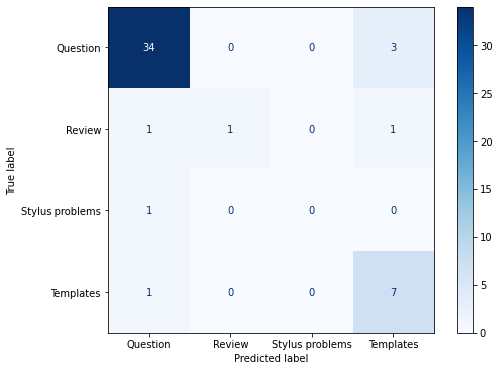

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ConfusionMatrixDisplay.from_predictions(val_labels, predicted_noupsample_labels, cmap='Blues', ax=ax)

Initialize model for training with upsampled data

In [17]:
model_upsample_args = {
    "output_dir": './single-task-withupsample', #specify output directory
    "max_seq_length": 400, # maximum sequence length in tokens
    "train_batch_size": 2, # training batch size
    "eval_batch_size": 2, # evaluation batch size
    "num_train_epochs": 4, # number of epochs
    "evaluate_during_training": True, # run evaluation during training
    "evaluate_during_training_steps": 15000, # steps in training before eval
    "evaluate_during_training_verbose": True, # print results from evaluation during training
    "use_multiprocessing": False, # use multiprocessing when converting data into features
    "fp16": False, # use fp16 mode
    "save_steps": -1, # save a model checkpoint at every specified number of steps
    "save_eval_checkpoints": False, # save evaluation checkpoints
    "save_model_every_epoch": False, #save model checkpoint at the end of every epoch
    "reprocess_input_data": True, # reprocess the input data
    "overwrite_output_dir": True, # overwrite the output directory
    "wandb_project": "Opinion Mining - T5 - single task",
}

In [18]:
model_upsample = T5Model('t5', 't5-small', use_cuda=False, args=model_upsample_args)

Train the model with data with upsamples

In [19]:
model_upsample.train_model(train_upsample_df, eval_data=eval_noupsample_df)

  0%|          | 0/326 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

Running Epoch 1 of 4:   0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

Running Epoch 2 of 4:   0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

Running Epoch 3 of 4:   0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/Users/shen/opt/miniconda3/envs/opinion_mining_3/lib/python3.8/site-packages/transformers/t

(652,
 {'global_step': [163, 326, 489, 652],
  'eval_loss': [0.2625440804543905,
   0.3306530306432978,
   0.46639041234721845,
   0.4263930536501766],
  'train_loss': [0.10509510338306427,
   0.0034957819152623415,
   1.9090188288828358e-05,
   0.0001884564117062837]})

In [20]:
wandb.finish()

Training loss,█▂▂▄▁▁▁▁▁▁▁▁▁
eval_loss,▁▃█▇
global_step,▁▂▂▂▃▃▄▄▄▅▆▆▆▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▁▁▁
Training loss,7e-05
eval_loss,0.42639
global_step,652
lr,0.001
train_loss,0.00019


Evaluate the model

In [21]:
model_upsample_eval_args = {
    "overwrite_output_dir": True,
    "max_seq_length": 400,
    "eval_batch_size": 4,
    "use_multiprocessing": False,
    "num_beams": 5,
    "do_sample": True,
    "max_length": 10,
    "top_k": 50,
    "top_p": 0.95,
    "num_return_sequences": 2,
}
# Load the trained model
model_upsample_eval = T5Model("t5", "single-task-withupsample", use_cuda=False, args=model_upsample_eval_args)

In [22]:
# Get the model predictions
preds_upsample = model_upsample_eval.predict(to_predict)

Generating outputs:   0%|          | 0/13 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/98 [00:00<?, ?it/s]

In [23]:
predicted_upsample_labels = []
for cur_pred in preds_upsample:
    cur_pred = cur_pred[0].strip()
    predicted_upsample_labels.append(cur_pred)

In [24]:
print(classification_report(val_labels, predicted_upsample_labels))

                 precision    recall  f1-score   support

       Question       0.86      1.00      0.92        37
         Review       1.00      0.33      0.50         3
Stylus problems       0.00      0.00      0.00         1
      Templates       1.00      0.62      0.77         8

       accuracy                           0.88        49
      macro avg       0.72      0.49      0.55        49
   weighted avg       0.87      0.88      0.85        49



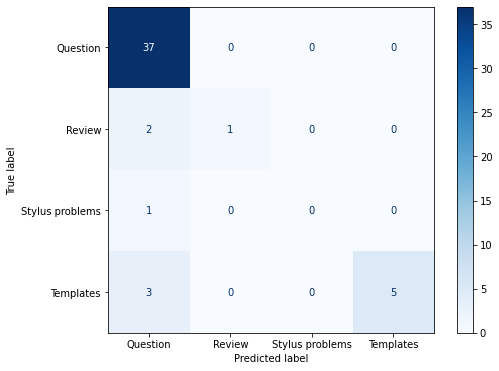

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ConfusionMatrixDisplay.from_predictions(val_labels, predicted_upsample_labels, cmap='Blues', ax=ax)